# JOVIA ASSIGNMENT ON A FREE MACHINE LEARNING WITH PYTHON: ZERO TO GBMS
* This assignment is a follow up on the course am taking on jovia: machine learning with python: zero to GBMS
* This essence of the assignment is to derive insight from a credit data base and to be able to predict the credit score of individuals wether they will deflaut or not.
* The data is gotten from [kaggle](https://www.kaggle.com) at this [link](https://www.kaggle.com/c/GiveMeSomeCredit)
* I hope to all python libraries and many more that I have learnt during the course to run a predict model and explore my dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data for further exploration
df = pd.read_csv('cs-training.csv', index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df.shape

(150000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
df.isna().any()

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [6]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

* It can be deduce from the above 3 blocks that some columns of the data contain some missing value. The columns includes:

> MonthlyIncome

> NumberOfDependents


* This missing values raises the question of dealing with missing values and in doing; Given the limited feature avail to us in the dataset removing these two features might not really be the best option aside this monthlyincome and numberofdependents has important role to play if an individual will default or or not as we will see below. 
* Therefore dealing with missing value I deleted all the rows with missing value

<AxesSubplot:>

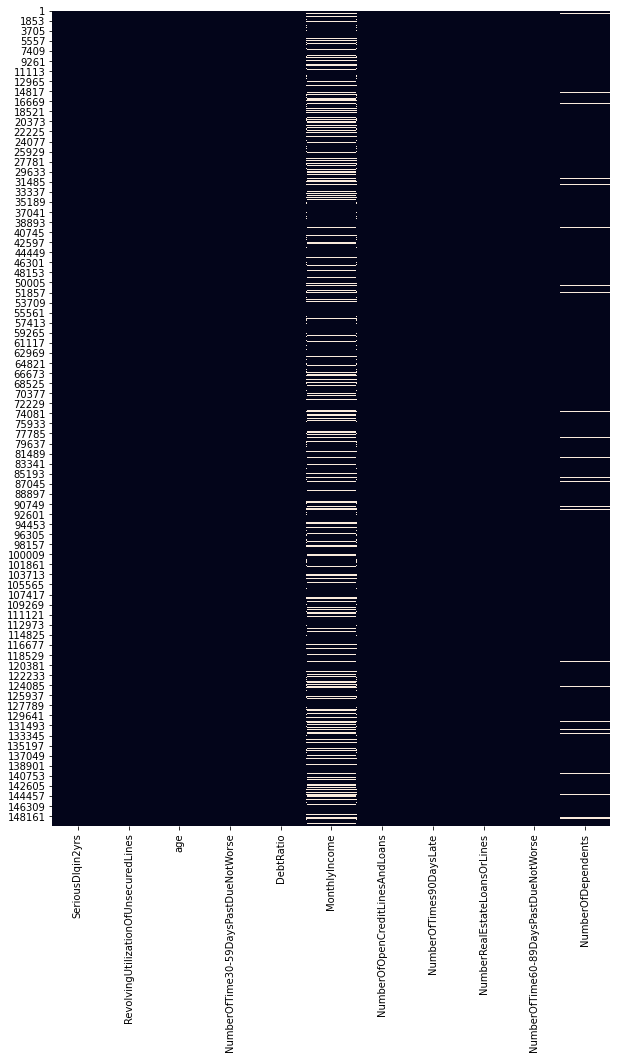

In [7]:
plt.figure(figsize=(10,15))
sns.heatmap(df.isna(), cbar=False)

In [8]:
df = df[~df['MonthlyIncome'].isna()]

In [9]:
df.isna().any()

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

After dealing with the missing values we are left with 120269 rows and 11 features

In [10]:
df.shape

(120269, 11)

# DATA EXPLORATION

* In this section I try to look make use of statistical tools to inspect the dataset descriptively and visualize
* I was able to realize that the dataset consist of outlier and was dealt with
* The class in the data also is not balance has the number of default(1) is less than the number of non-default
* No serious attempt was made at dealing with this imbalance dataset except the introduction of class weight in the model used

In [11]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


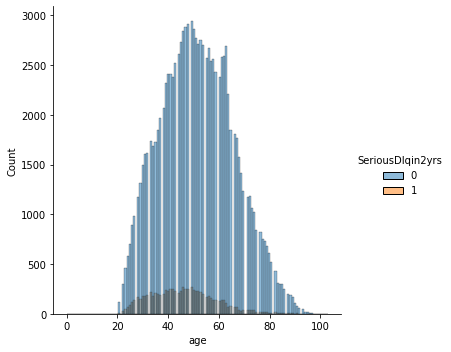

In [12]:
sns.displot(data = df, x = 'age', hue= 'SeriousDlqin2yrs')

<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='count'>

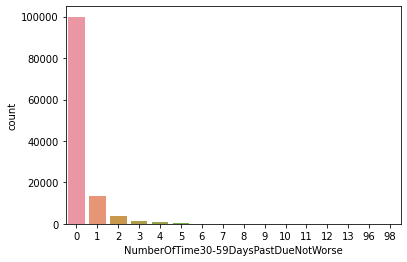

In [13]:
sns.countplot(data=df, x = 'NumberOfTime30-59DaysPastDueNotWorse')

sns.pairplot(data = df, vars=list(df.columns[1:]), kind='scatter', hue='SeriousDlqin2yrs')

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

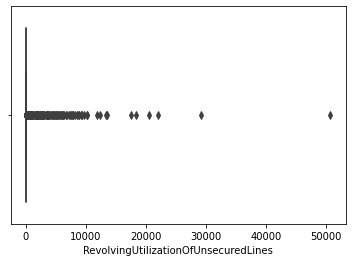

In [14]:
sns.boxplot(data = df, x = 'RevolvingUtilizationOfUnsecuredLines')

<AxesSubplot:xlabel='DebtRatio'>

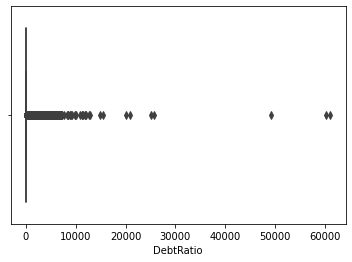

In [15]:
sns.boxplot(data = df, x = 'DebtRatio')

<AxesSubplot:xlabel='age'>

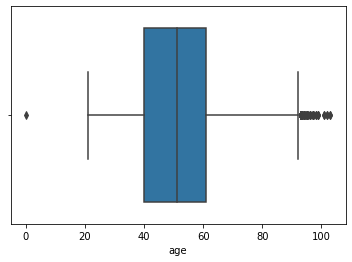

In [16]:
sns.boxplot(data = df, x = 'age')

In [17]:
outlier_removal = df[df['RevolvingUtilizationOfUnsecuredLines'].between(0, 1)]

df_new = outlier_removal[outlier_removal['DebtRatio'].between(0, 1)]
print(f'shape of data without outliers: {df_new.shape}')

shape of data without outliers: (110438, 11)


<AxesSubplot:xlabel='DebtRatio'>

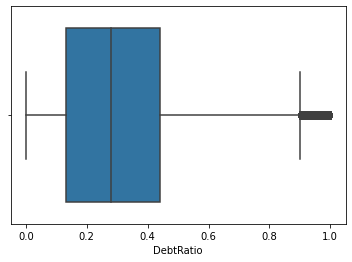

In [18]:
sns.boxplot(data = df_new, x = 'DebtRatio')

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

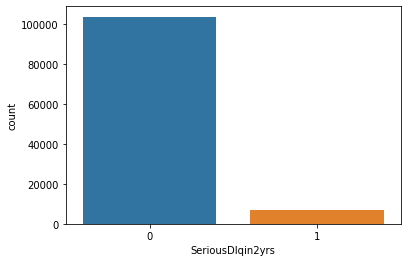

In [19]:
sns.countplot(data = df_new, x = 'SeriousDlqin2yrs')

# TRAINING OF MODEL
* I made use of randomforestclassifier and decisiontreeclassifier in training the dataset
* To determine the performance of the model I made use of roc_auc_score
* Also I splited the dataset with 30% of the dataset to test the train data which is 70%


In [20]:
X = df_new.drop(columns=['SeriousDlqin2yrs']).copy()
y = df_new['SeriousDlqin2yrs']

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, stratify=y, test_size=0.3)

In [24]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(f'roc accuracy: {roc_auc_score(y_test, y_pred)}')

roc accuracy: 0.5972462357045434


In [25]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(f'roc accuracy: {roc_auc_score(y_test, y_pred2)}')

roc accuracy: 0.5623603588010371


In [32]:
# This function was written in order the check the performance of th model by alternating the argument
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42, **params).fit(X_train, y_train)
    train_roc = roc_auc_score(y_train, model.predict(X_train))
    test_roc = roc_auc_score(y_test, model.predict(X_test))
    return train_roc, test_roc

In [87]:
# visual inspection of alternation above
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('roc_auc_score')
    plt.legend(['Training', 'Validation'])

In [82]:
def test_params_random(**params):
    model = RandomForestClassifier(random_state=42, **params).fit(X_train, y_train)
    train_roc = roc_auc_score(y_train, model.predict(X_train))
    test_roc = roc_auc_score(y_test, model.predict(X_test))
    return train_roc, test_roc

In [86]:
def test_param_and_plot_random(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_random(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('roc_auc_score')
    plt.legend(['Training', 'Validation'])

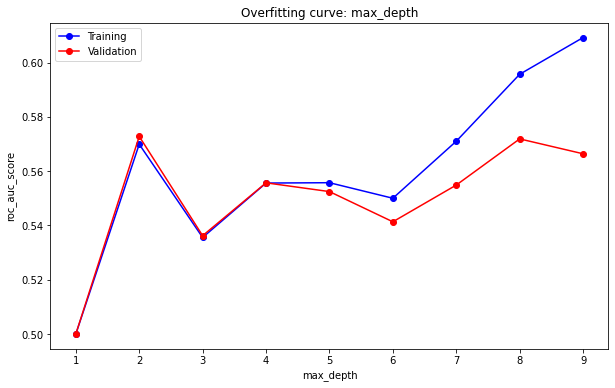

In [33]:
test_param_and_plot('max_depth', np.arange(1, 10))

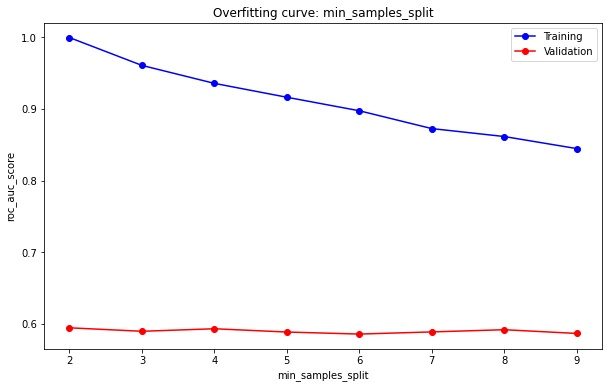

In [37]:
test_param_and_plot('min_samples_split', np.arange(2, 10))

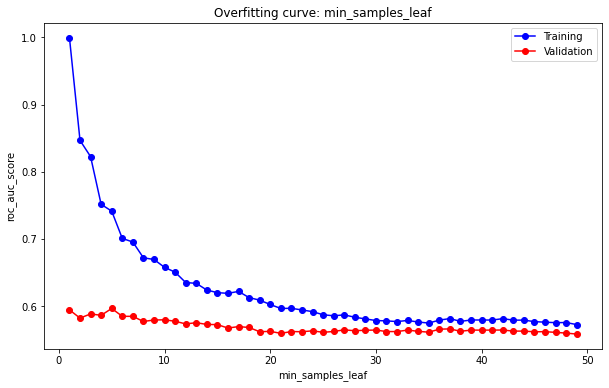

In [39]:
test_param_and_plot('min_samples_leaf', np.arange(1, 50))

In [40]:
# Using sklearn gridsearchcv to determine the best parameter
from sklearn.model_selection import GridSearchCV

In [55]:
estimator = model1
param = {'criterion': ["gini", "entropy"], 
         'max_depth': np.arange(1, 10), 
         'max_features': ['log2', 'sqrt'],
         'min_samples_leaf': np.arange(1, 10),
         'min_samples_split': np.arange(2, 10)
        }
grid = GridSearchCV(estimator=estimator, param_grid=param, scoring='roc_auc', cv = 5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc')

In [56]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 9}

In [57]:
grid.best_score_

0.8272570737478574

In [114]:
model1_best = DecisionTreeClassifier(criterion = 'entropy',
                                     max_depth = 6,
                                     max_features = 'sqrt',
                                     min_samples_leaf = 8,
                                     min_samples_split = 9,
                                     class_weight = {1:0.1, 0:0.9})

In [115]:
model1_best.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, criterion='entropy',
                       max_depth=6, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=9)

In [116]:
y_pred_decisiontree = model1_best.predict(X_test)
roc_score_decisiontree = roc_auc_score(y_test, y_pred_decisiontree)
print('roc_score on the test dataset: ', roc_score_decisiontree)

roc_score on the test dataset:  0.5


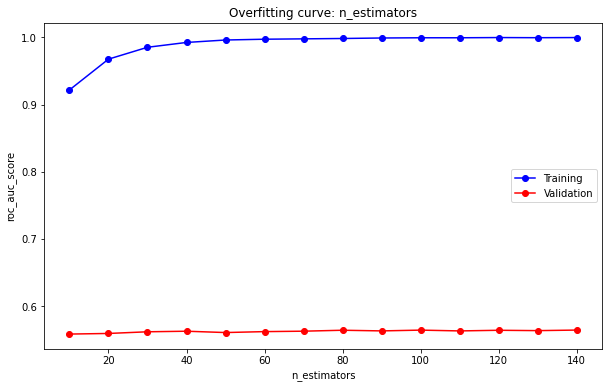

In [90]:
test_param_and_plot_random('n_estimators', np.arange(10, 150, 10))

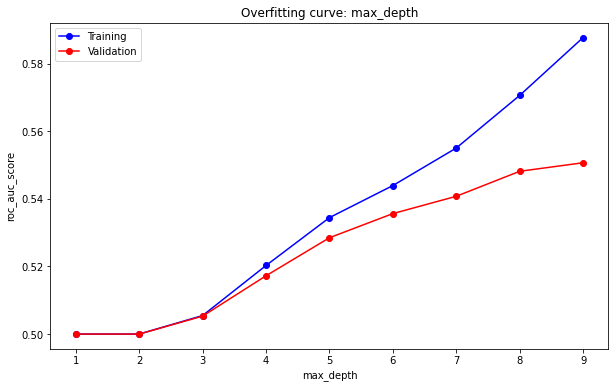

In [91]:
test_param_and_plot_random('max_depth', np.arange(1, 10))

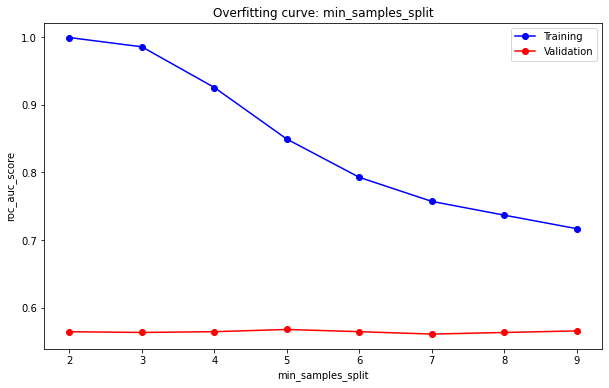

In [92]:
test_param_and_plot_random('min_samples_split', np.arange(2, 10))

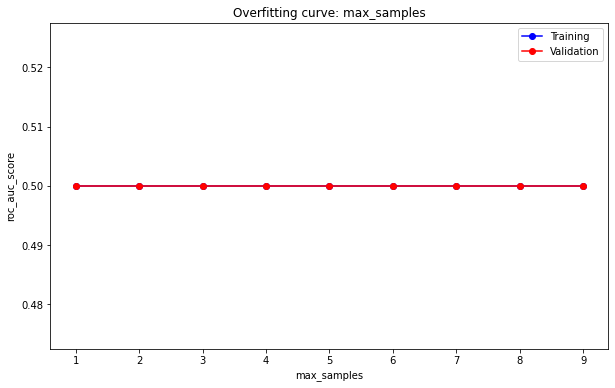

In [96]:
test_param_and_plot_random('max_samples', np.arange(1, 10))

In [105]:
test_params_random(class_weight = {1:0.1, 0:0.9})

(0.9993574641250803, 0.5811386732190423)

In [112]:
estimator = model2
param = {'n_estimators': np.arange(10, 150, 10),
         'criterion': ["gini", "entropy"], 
         'max_depth': np.arange(1, 10), 
         'max_features': ['log2', 'sqrt'],
         'min_samples_leaf': np.arange(1, 10),
         'min_samples_split': np.arange(2, 10),
         'class_weight': [{1:0.1, 0:0.9}, {1:0.27, 0:0.73}]
        }
grid = RandomizedSearchCV(estimator=estimator, param_distributions=param, scoring='roc_auc', cv = 5)
grid.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': [{0: 0.9, 1: 0.1},
                                                         {0: 0.73, 1: 0.27}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])},
                   scoring='roc_auc')

In [117]:
grid.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'gini',
 'class_weight': {1: 0.1, 0: 0.9}}

In [118]:
grid.best_score_

0.8443513126276052

In [125]:
model2_best = RandomForestClassifier(n_estimators = 80,
                                     min_samples_split = 5,
                                     min_samples_leaf = 5,
                                     max_features = 'sqrt',
                                     max_depth = 9,
                                     criterion = 'gini',
                                     class_weight = {1: 0.1, 0: 0.9}
                                    )

In [126]:
model2_best.fit(X_train, y_train)
y_pred_random = model2_best.predict(X_test)
roc_score_random = roc_auc_score(y_test, y_pred_random)
print('roc_score on the test dataset: ', roc_score_random)

roc_score on the test dataset:  0.5007496251874063


In [127]:
import pickle as pk

In [128]:
# save the best the model
best_decision_tree = {'model_without_param_search': model1, 
                      'model_with_param_search':model1_best, 
                      'scaler': scaler}
with open('best_decision_tree', 'wb') as file:
    pk.dump(best_decision_tree, file)

In [129]:
best_random_forest = {'model_without_param_search': model2, 
                      'model_with_param_search':model2_best, 
                      'scaler': scaler}
with open('best_random_forest', 'wb') as file:
    pk.dump(best_random_forest, file)

# CONCLUSION
* The performance of the two model on the dataset was poor and none of the roc score was above 60% and was I suspect was responsible for this poor performance is because is because the dataset is imbalance as mention earlier, this has made the model to tend to overfit to the train set with performing poorly on the validation set

# REFERENCE
1. kaggle
2. Jovia
3. github
4. medium